# Lista de Exercícios V

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 05/10/2020

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

## Problema 1

### Letra a)

O método de relaxamento consiste em um método iterativo usado para resolver equações não lineares. Isso significa que escolhemos um valor inicial para inserir na equação que nós fornece outro valor. Se repetirmos o processo indefinidamente, eventualmente ele convergirá para a solução desejada.

Há um truque para saber se o método converge. Se o valor absoluto da derivada da função $f(x)$ na solução for tal que: $x=f(x)<1$, então ele irá comvergir. Caso contrário, devemos resolver a mesma equação, mas de outra forma.

O erro na estimativa mais recente de $x$ é dado pela seguinte equação:

$$e=\frac{x-x'}{1-\frac{1}{f'(x)}}$$

onde $x'$ é a estimativa mais recente e $x$ a estimativa anterior.

Dessa forma, seja a equação não linear $x=1-e^{-cx}$, para $c=2$ e com uma precisão de pelo menos $\epsilon=10^{-6}$:

In [3]:
epsilon = 1e-6

x = 1
error = 1

while error > epsilon:
    x , x_line = 1-np.exp(-2*x), x
    error = abs( (x-x_line)/(1-1/(2*np.exp(-2*x))) )
    
print('x =',x)

x = 0.7968126311118457


### Letra b)

Primeiramente, uma função chamada `opt_plot()` para melhorar o aspecto estético dos plots:

In [4]:
def opt_plot():
        plt.minorticks_on()
        plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length=5,width=1,labelsize=15)
        plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length=8,width=1,labelsize=15)

Agora, vamos determinar a solução para valores de $c$ no intervalo $[0,3]$ espaçado de $0.01$ (passo).

In [5]:
C = np.arange(0,3.01,0.01)
X = np.empty_like(C)

for i , c in enumerate (C):
    epsilon = 1e-6

    x = 1
    error = 1

    while error > epsilon:
        x , x_line = 1-np.exp(-c*x), x
        X[i] = x
        error = abs((x-x_line)/(1-1/(2*np.exp(-2*x))))

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


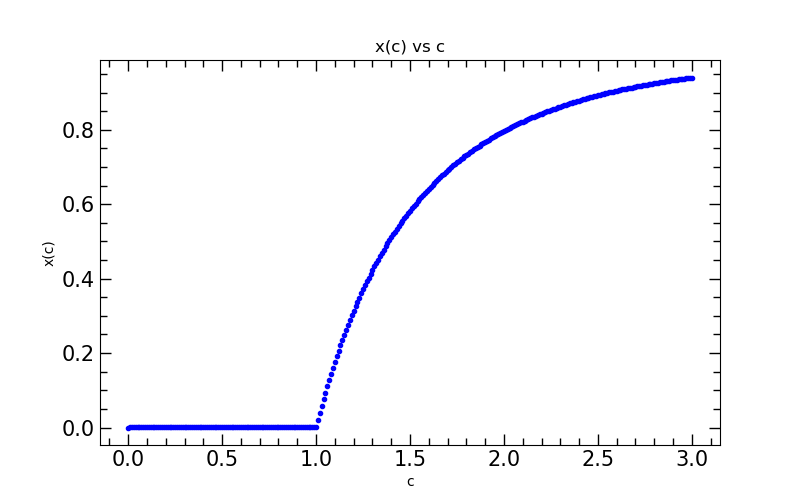

In [6]:
plt.figure(figsize=(8,5))

plt.plot (C,X,'b.')
plt.title('x(c) vs c')
plt.xlabel('c')
plt.ylabel('x(c)')
opt_plot()

$\text{ }$

## Problema 2

### Letra a)

Desejamos determinar o par ordenado $(x,y)$ que é solução do seguinte sistema de equações

\begin{cases}
-x+ay+x^{2}y=0 \\
b-ay-x^{2}y=0 \\
\end{cases}

Note que podemos reescrever o sistema acima da seguinte forma

\begin{equation}
\begin{cases}
x=x^{2}y+ay \\
b=x^{2}y+ay\\
\end{cases}
\end{equation}

Por comparação, temos que $x=b$, substituindo na segunda equação do sistema acima obtemos

$$b=b^{2}y+ay=y(b^{2}+a)\text{   }\therefore\text{   }\boxed{y=\frac{b}{b^{2}+a}}$$

$\blacksquare$

### Letra b)

Considere o mesmo sistema de equações abordado na **Letra a)**

\begin{equation}
\begin{cases}
x=x^{2}y+ay \\
b=x^{2}y+ay\\
\end{cases}
\end{equation}

Pondo o $y$ em evidência na primeira equação e isolando o $y$ na segunda equação obtemos

\begin{cases}
x=y(a+x^{2}) \\
y=\frac{b}{x^{2}+a} \\
\end{cases}

$\blacksquare$

Vamos definir duas funções de duas variáveis `f(x,y)` e `g(x,y)` que serão justamente as duas equações presentes no sistema acima. Os valores de nossas constantes serão $a=1$ e $b=2$.

In [7]:
def f(x,y):
    a = 1
    return y*(a+x*x)

def g(x,y):
    a = 1
    b = 2
    return b/(x*x+a)

Agora, vamos aplicar o método da relaxação com duas variáveis, para isso, vamos definir uma função chamada `relaxation_2_variables(x0, y0, f, g, eps)`.

O objetivo dessa função será resolver um conjunto de equações não lineares com até duas variáveis tais que $x=f(x,y)$.

Vamos começar com os seguintes valores iniciais (chutes): $x=x_{0}$ e $y=y_{0}$. Caso a convergência do método não ocorra, vamos aplicar um exceção:

In [8]:
def relaxation_2_variables(x0, y0, f, g, eps):
    x1 , y1 = x0 , y0
    x2 , y2 = f(x1,y1) , g(x1,y1)
    error_x , error_y = abs((x1-x2)/x1) , abs((y1-y2)/y1)
    
    i = 0
    while (eps < error_x or eps < error_y):
        i += 1
        if i > 50:
            raise Exception('O método não converge.')
        else:
            x1 , y1 = x2 , y2
            x2 , y2 = f(x1,y1) , g(x1,y1)
            error_x , error_y = abs((x1-x2)/x1), abs((y1-y2)/y1)
        
    return x1 , y1

Agora vamos ver se conseguimos encontrar os pontos estacionários de nosso sistema:

In [9]:
relaxation_2_variables(1.5 , 0.2 , f , g , 1e-6)

Exception: O método não converge.

Como se pode ver, o nosso método não converge neste caso, o que já era esperado.

### Letra c)

Considere o sistema de equações apresentado na **Letra a)**. Note que podemos reescrevê-lo da seguinte forma:

\begin{cases}
y=\frac{x}{x^{2}+a} \\
\\
x = \sqrt{\frac{b-ay}{y}}
\end{cases}

Analogamente ao item anterior, definiremos duas novas funções `f2(x,y)` e `g2(x,y)` para implementar as duas equações do sistema acima:

In [10]:
def f2(x,y):
    a = 1
    b = 2
    return np.sqrt((b-a*y)/y)

def g2(x,y):
    a = 1
    b = 2
    return x/(x*x+a)

Agora vamos novamente aplicar o nosso método:

In [11]:
x,y = relaxation_2_variables(1.5 , 0.2 , f2 , g2 , 1e-6)
print('As soluções são: \nx =', x , '\ny =' , y , '\n\nErro = 10^(-6).')

As soluções são: 
x = 2.0000011381776868 
y = 0.40000005919842974 

Erro = 10^(-6).


Note que nossa solução está de acordo com o esperado. $(x=2,y=0.4)$.

$\text{ }$

## Problema 3

### Letra a)

Vamos determinar o comprimento de onda $\lambda$ no qual a radiação emitida é mais forte. Dessa forma, podemos escrever:

$$\frac{\partial I}{\partial\lambda}=0\Longleftrightarrow2\pi hc^{2}\frac{\partial}{\partial\lambda}\Bigg(\frac{\lambda^{-5}}{e^{\frac{hc}{\lambda k_{B}T}}-1}\Bigg)=0$$

$$\Longleftrightarrow2\pi hc^{2}\Bigg(\frac{-5\lambda^{-6}}{e^{\frac{hc}{\lambda k_{B}T}}-1}+\frac{hc}{k_{B}T\lambda^{7}}\cdot\frac{e^{\frac{hc}{\lambda k_{B}T}}}{e^{\frac{hc}{\lambda k_{B}T}}-1}\Bigg)=0$$

$$\Longleftrightarrow\frac{2\pi hc^{2}}{\lambda^{6}\Big(e^{\frac{hc}{\lambda k_{B}T}}-1\Big)}\cdot\Bigg[-5+\frac{hc}{k_{B}T^{\lambda}}\cdot\frac{e^{\frac{hc}{\lambda k_{B}T}}}{e^{\frac{hc}{\lambda k_{B}T}}-1}\Bigg]=0$$

$$\Longleftrightarrow\frac{2\pi hc^{2}}{\lambda^{6}\Big(e^{\frac{hc}{\lambda k_{B}T}}-1\Big)}\cdot\Bigg[\frac{-5e^{e^{\frac{hc}{\lambda k_{B}T}}}+5+\frac{hc}{k_{B}T\lambda^{7}}\cdot\frac{e^{\frac{hc}{\lambda k_{B}T}}}{e^{\frac{hc}{\lambda k_{B}T}}-1}}{e^{\frac{hc}{\lambda k_{B}T}}-1}\Bigg]=0$$

$$\Longleftrightarrow\frac{2\pi hc^{2}}{\lambda^{6}}\cdot\frac{e^{\frac{hc}{\lambda k_{B}T}}}{\Big(e^{\frac{hc}{\lambda k_{B}T}}-1\Big)^{2}}\cdot\Bigg[-5+5e^{\frac{hc}{\lambda k_{B}T}}+\frac{hc}{\lambda k_{B}T}\Bigg]=0$$

Uma vez que os termos à direita dos colchetes nunca podem ser iguais a zero, temos que

$$-5+5e^{\frac{-hc}{\lambda k_{B}T}}+\frac{hc}{\lambda k_{B}T}=0$$

Se substituirmos $x=\frac{hc}{\lambda k_{B}T}$, então obtemos como resultado

$$\lambda=\frac{hc}{xk_{B}T}=\frac{\frac{hc}{k_{B}x}}{T}=\frac{b}{T}$$

No caso, $b$ é a constante de deslocamento. Dessa forma, a equação acima assume a seguinte forma:

$$5e^{-x}+x-5=0$$

$\blacksquare$

Vamos plotar o gráfico dessa função para termos uma melhor noção do comportamento dessa função

<IPython.core.display.Javascript object>


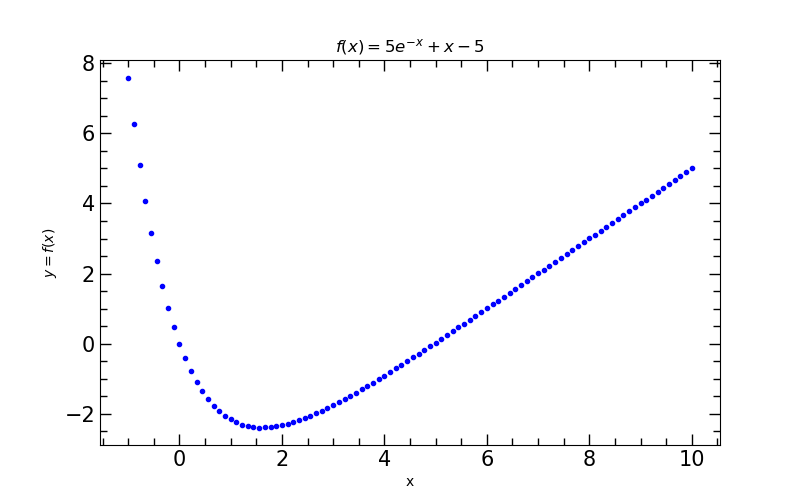

In [12]:
x = np.linspace(-1,10,100)

plt.figure(figsize=(8,5))
plt.plot(x, 5*np.exp(-x)+x-5, 'b.')
plt.title(r'$f(x)=5e^{-x}+x-5$')
plt.xlabel('x')
plt.ylabel(r'$y=f(x)$')
opt_plot()

### Letra b)

Analisando o gráfico presente na **Letra a)**, vemos que o mínimo está situado em torno $x=5$. Desde que $x=\frac{1}{\lambda}$ o mínimo de $x$ corresponde ao máximo de $\lambda$.

In [13]:
def f(x):
    return 5*np.exp(-x) +x - 5

Definimos as constantes que serão usadas:

In [14]:
h = 6.626e-34
c = 3e8
kB = 1.38e-23

Finalmente vamos ao valor da constante de deslocamento de Wien $b$:

In [15]:
x=4.965*10**-8
b = h*c/x/kB 

print ('A constante de deslocamento de Wien é:', b, 'km')

A constante de deslocamento de Wien é: 290117.78098865977 km


O valor real da constante de deslocamento de Wien é $b=2,8978\cdot10^{-3}$ $km$. 

### Letra c)

Sabe-se que a temperatura pode ser determinada em função da constante de deslocamento de Wien através da equação

$$T=\frac{b}{\lambda}$$

Sendo $\lambda=502$ $nm$ o comprimento de onda máximo da radiação emitida pelo Sol e $[T]=K$, podemos facilmente determinar a temperatura na superfície do Sol (temperatura efetiva) por meio da equação acima:

In [16]:
Lambda = 502e-9
T = b/Lambda

print('Temperatura na superíficie do Sol (efetiva): ', T, 'K')

Temperatura na superíficie do Sol (efetiva):  577923866511.2744 K


$\text{ }$